<a href="https://colab.research.google.com/github/HarrisonGrubb/PricingCaseStudies/blob/master/Avocado_Toast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Reading In the Needed Packages




In [ ]:
!pip install statsmodels --upgrade

In [ ]:
!pip install atspy

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from google.colab import drive
from atspy import AutomatedModel
drive.mount('/content/drive')

INFO:root:Using CPU


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Reading in and cleaning the Data


In [ ]:
data = pd.read_csv('/content/drive/My Drive/Kaggle Contest Data/avocado.csv')

In [ ]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
encoder = LabelEncoder()
# https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd

In [ ]:
data['regionNumber'] = encoder.fit_transform(data['region'])
data['typeIndic'] = encoder.fit_transform(data['type'])
data['LogPrice'] = np.log(data['AveragePrice'])
data['LogVolume'] = np.log(data['Total Volume'])

In [ ]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,regionNumber,typeIndic,LogPrice,LogVolume
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,0,0,0.285179,11.070329
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,0,0,0.300105,10.912849
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,0,0,-0.072571,11.680304
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,0,0,0.076961,11.277104
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,0,0,0.246860,10.840357


In [ ]:
data.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,regionNumber,typeIndic,LogPrice,LogVolume
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,26.495644,0.499918,0.299572,11.316294
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,15.583788,0.500014,0.289686,2.293534
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,0.000000,0.000000,-0.820981,4.437461
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,13.000000,0.000000,0.095310,9.290867
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,26.000000,0.000000,0.314811,11.584099
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,40.000000,1.000000,0.506818,12.978406
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,53.000000,1.000000,1.178655,17.950767


# EDA and Visual Analysis


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


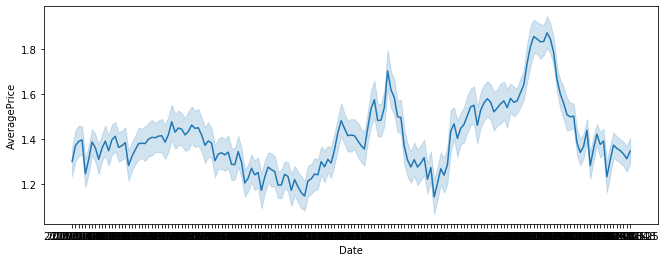

In [ ]:
sns.lineplot(x=data['Date'], y=data['AveragePrice'])

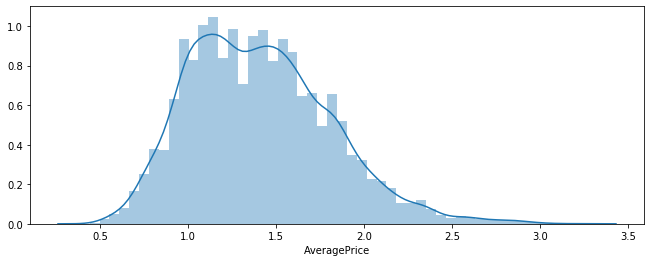

In [ ]:
sns.distplot(data['AveragePrice'])

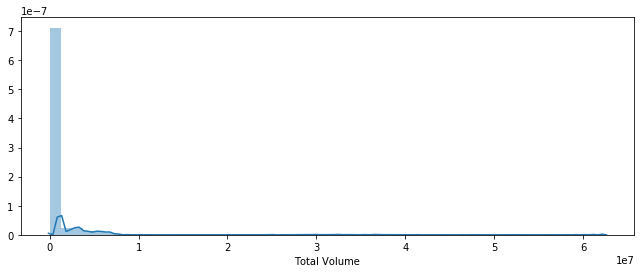

In [ ]:
sns.distplot(data['Total Volume'])

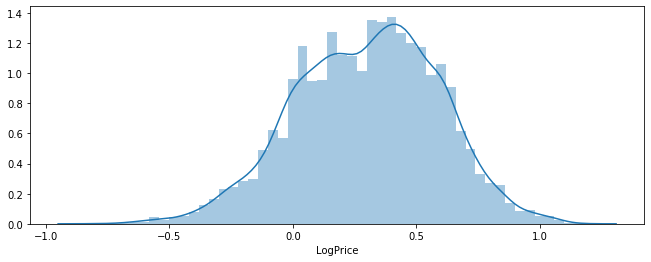

In [ ]:
sns.distplot(data['LogPrice'])

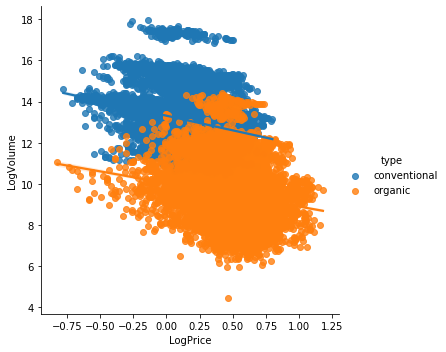

In [ ]:
sns.lmplot(x='LogPrice', y='LogVolume', hue='type', data=data)

# Price Analysis


In [ ]:
X = data['LogPrice']
Y = data['LogVolume']

In [ ]:
model = sm.GLS(Y, X)
results = model.fit()
print(results.summary())

                                 GLS Regression Results                                
Dep. Variable:              LogVolume   R-squared (uncentered):                   0.388
Model:                            GLS   Adj. R-squared (uncentered):              0.388
Method:                 Least Squares   F-statistic:                          1.156e+04
Date:                Mon, 08 Jun 2020   Prob (F-statistic):                        0.00
Time:                        18:33:21   Log-Likelihood:                         -66060.
No. Observations:               18249   AIC:                                  1.321e+05
Df Residuals:                   18248   BIC:                                  1.321e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
model_data = data.drop(labels=['Unnamed: 0', '4046',	'4225',	'4770',	'Total Bags',	'Small Bags',	'Large Bags',	'XLarge Bags' ], axis=1)

model_data.to_csv('output.csv')

model_data = model_data.drop(labels=['Date', 'AveragePrice', 'Total Volume', 'type', 'region'], axis=1)

In [ ]:
model_data.head()

,year,regionNumber,typeIndic,LogPrice,LogVolume
0,2015,0,0,0.285179,11.070329
1,2015,0,0,0.300105,10.912849
2,2015,0,0,-0.072571,11.680304
3,2015,0,0,0.076961,11.277104
4,2015,0,0,0.246860,10.840357


In [ ]:
Y = model_data['LogVolume']
X = model_data
X = X.drop(labels=['LogVolume'], axis=1)

In [ ]:
model = ols('LogVolume ~ LogPrice + year + regionNumber + typeIndic', data=model_data).fit()


INFO:numexpr.utils:NumExpr defaulting to 2 threads.


In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              LogVolume   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     9376.
Date:                Mon, 08 Jun 2020   Prob (F-statistic):               0.00
Time:                        18:33:22   Log-Likelihood:                -30850.
No. Observations:               18249   AIC:                         6.171e+04
Df Residuals:                   18244   BIC:                         6.175e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -489.0742     20.975    -23.317   

In [ ]:
model.params

Intercept      -489.074152
LogPrice         -1.377952
year              0.248971
regionNumber      0.015902
typeIndic        -3.160574
dtype: float64

In [ ]:
line_model = LinearRegression()

In [ ]:
line_model.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
line_model.coef_

array([ 0.24897079,  0.01590172, -3.16057377, -1.3779518 ])

In [ ]:
line_model.score(X, Y)

0.6727307300324998

In [ ]:
prediction = line_model.predict(X)

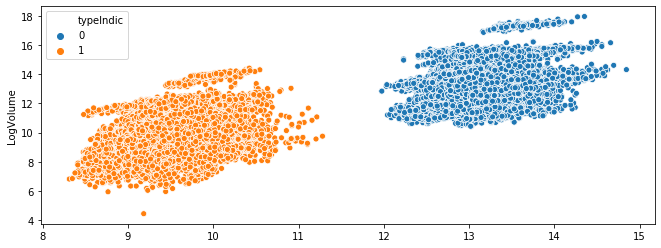

In [ ]:
sns.scatterplot(x=prediction, y=Y, hue=model_data['typeIndic'])

# Time Series Forecasting


In [ ]:
model_list = ["HWAMS","HWAAS","TBAT", "Prophet"]


In [ ]:
alb_data = model_data[model_data['regionNumber']==0]
alb_data = alb_data[alb_data['typeIndic']==0]

In [ ]:
alb_data = alb_data.drop(labels=['year', 'regionNumber', 'typeIndic', 'LogPrice'], axis=1)

In [ ]:
alb_data.head()

,LogVolume
0,11.070329
1,10.912849
2,11.680304
3,11.277104
4,10.840357


In [ ]:
am = AutomatedModel(df = alb_data , model_list=model_list,forecast_len=20 )

In [ ]:
forecast_in, performance = am.forecast_insample(); forecast_in